In [2]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

import warnings
warnings.simplefilter("ignore")

## Percentiles ##

Definition: Let p be a number between 0 and 100. The pth percentile of a collection is the smallest value in the collection that is at least as large as p% of all the values.

In [3]:
arr = make_array(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [4]:
# returns 2 because
#   2 is at least as large as 20% of the items in arr
#   2 is the smallest value for which this is true
percentile(20, arr)

2

In [5]:
# returns 3 because
#   3 is at least as large as 30% of the items in arr
#   3 is the smallest value for which this is true
percentile(30, arr)

3

In [6]:
# returns 3 because
#   3 is at least as large as 25% of the items in arr
#   3 is the smallest value for which this is true
percentile(25, arr)

3

## Discussion Question


In [7]:
arr2 = make_array(1, 3, 5, 7, 9)

In [8]:
# What will the following commands return?

In [9]:
# This is called the first quartile
percentile(25, arr2)

3

In [10]:
# This is called the second quartile,
# but more commonly known as the median
percentile(50, arr2)

5

In [11]:
# This is called the third quartile
percentile(75, arr2)

7

## Inference: Estimation

 Below is a table of 45,000 randomly sampled San Francisco employees.

In [12]:
sf = Table.read_table('san_francisco_2019.csv')
sf.show(6)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394,0,57312,216706
Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035,0,28671,98706
Public Protection,Adult Probation,Information Systems,IS Project Director,175742,0,60830,236572


In [13]:
# Filter out people working less than part time.

min_salary = 15 * 20 * 50 # $15/hr, 20 hr/wk, 50 weeks
sf = sf.where('Salary', are.above(min_salary))
sf.show(6)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394,0,57312,216706
Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035,0,28671,98706
Public Protection,Adult Probation,Information Systems,IS Project Director,175742,0,60830,236572


### Population Distribution

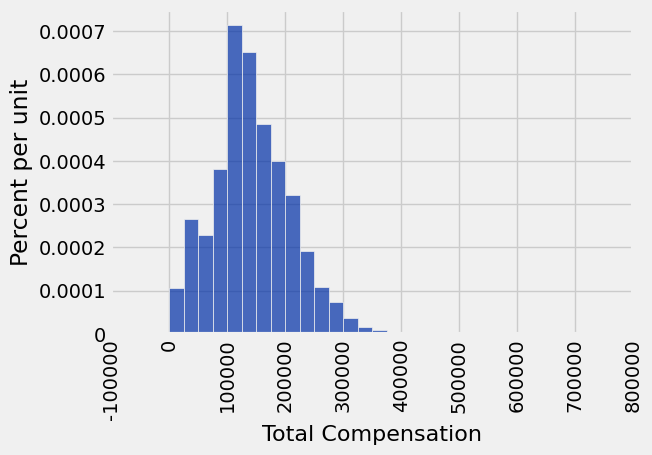

In [14]:
sf_bins = np.arange(0, 726000, 25000)
sf.hist('Total Compensation', bins=sf_bins)

**Question:** What was the median salary in San Francisco in 2019?

In [15]:
pop_median = percentile(50, sf.column('Total Compensation'))
pop_median

135747.0

That's the median of *our sample*. What is the median of the entire population?

# Bootstrap

In the bootstrap technique, we:
 - sample randomly
 - from the original sample
 - with replacement
 - the same number of times as the original sample size

Default behavior of `tbl.sample`: at random with replacement, the same number of times as rows of `tbl`

135695.0

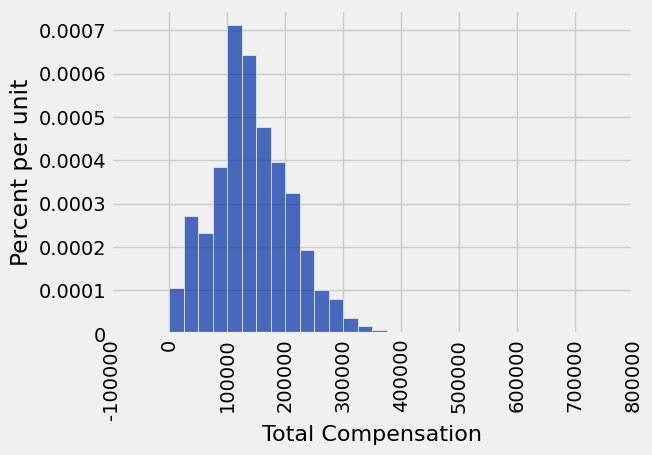

In [16]:
bootstrap_sample = sf.sample() # draw a new sample of the same size based on our data
bootstrap_sample.hist('Total Compensation', bins=sf_bins)
percentile(50, bootstrap_sample.column('Total Compensation')) # compute the median of the new sample

In [17]:
def one_bootstrap_median():
    bootstrap_sample = sf.sample()
    return percentile(50, bootstrap_sample.column('Total Compensation'))

In [18]:
one_bootstrap_median()

136780.0

In [19]:
bootstrap_medians = make_array()
for i in np.arange(100):
    bootstrap_medians = np.append(bootstrap_medians, one_bootstrap_median())
bootstrap_medians

array([ 135512.,  135511.,  135281.,  135710.,  136183.,  135491.,
        135659.,  135729.,  136161.,  135545.,  135652.,  134715.,
        136338.,  136284.,  135394.,  135577.,  135545.,  135748.,
        135509.,  135346.,  136160.,  135782.,  135358.,  135927.,
        136335.,  135710.,  136449.,  135511.,  135578.,  135664.,
        135336.,  135503.,  135423.,  135346.,  135434.,  135626.,
        136394.,  135712.,  135346.,  135179.,  135258.,  135738.,
        135861.,  134886.,  136837.,  136522.,  135242.,  135974.,
        136061.,  135772.,  135659.,  135596.,  135370.,  135622.,
        135974.,  135534.,  136213.,  135782.,  135826.,  135340.,
        135675.,  135768.,  135533.,  135511.,  135346.,  136015.,
        134912.,  136304.,  136226.,  135829.,  135438.,  135678.,
        135953.,  135534.,  136870.,  135955.,  135350.,  135434.,
        136061.,  135752.,  136309.,  135929.,  136304.,  135796.,
        135771.,  135369.,  135927.,  135626.,  134912.,  1357

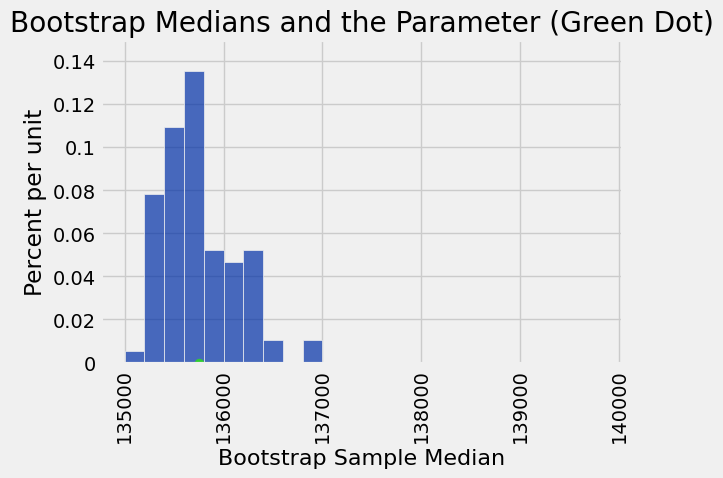

In [20]:
resampled_medians = Table().with_column('Bootstrap Sample Median', bootstrap_medians)

median_bins=np.arange(135000, 140000, 200)
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
parameter_green = '#32CD32'
plots.ylim(-0.000005, 0.0015)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2)
plots.title('Bootstrap Medians and the Parameter (Green Dot)');

## Percentile Method: Middle 95% of the Bootstrap Estimates 

In [21]:
left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

make_array(left, right)

array([ 134912.,  136522.])

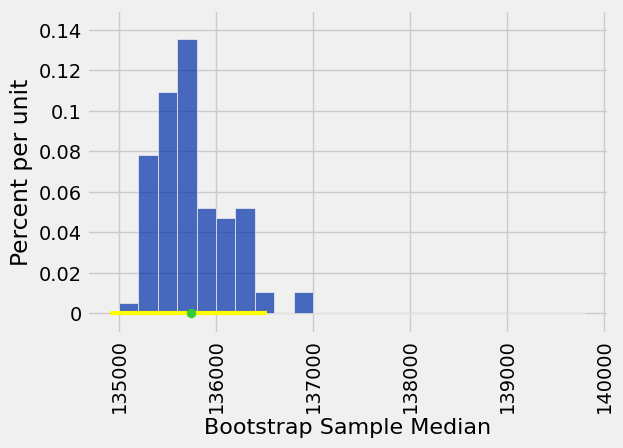

In [22]:
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
plots.ylim(-0.0001, 0.0015)
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=3, zorder=1)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2);

This is called a **confidence interval**. In 95% of simulations, the median fell between these two values.

"We are 95% confident that the median salary of the entire population is between these two values."
